## Power Analysis
- Power analysis is built from the following building blocks:
- significance level
- effect size
- power
- sample size

### We estimate the missing one, using the three known ones of the above metrics
- estimate sample size:   
  - assume the significance, power and effect size is acceptable to us
  - then we can know how big a smple we need to gather for such an experiment to yield valid results
- validate whether the probability of committing a Type II error is acceptable
    - given sample size, effect size and significance level
    - 1 - power is the probability of commiting Type II error
   

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Estimate Sample Size

In [2]:
from statsmodels.stats.power import TTestIndPower

In [5]:
effect_size = 0.8
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()

sample_size = power_analysis.solve_power(effect_size=effect_size,
                                         power = power,
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


### 2. Power & Sample Size
- power increases as the sample size gets larger

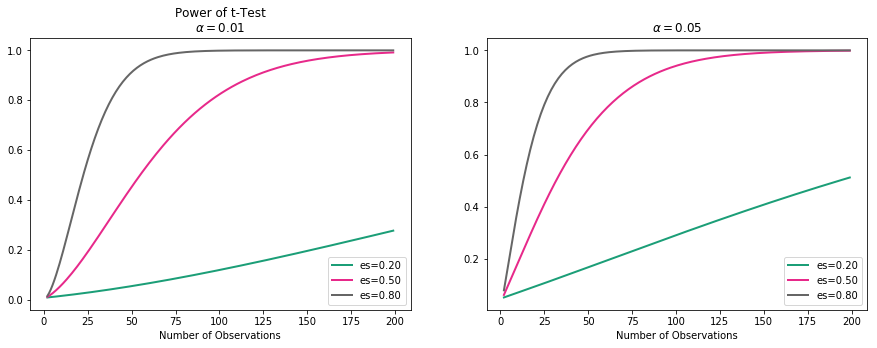

In [36]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs', 
                                nobs=np.arange(2,200), 
                                effect_size=np.array([0.2,0.5,0.8]),
                                alpha=0.01,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')


ax = fig.add_subplot(1,2,2)
fig = TTestIndPower().plot_power(dep_var='nobs', 
                                nobs=np.arange(2,200), 
                                effect_size=np.array([0.2,0.5,0.8]),
                                alpha=0.05,
                                ax=ax, 
                                title=r'$\alpha = 0.05$')


### 3. Power & Significance (Alpha)
- power increases as Alpha gets larger

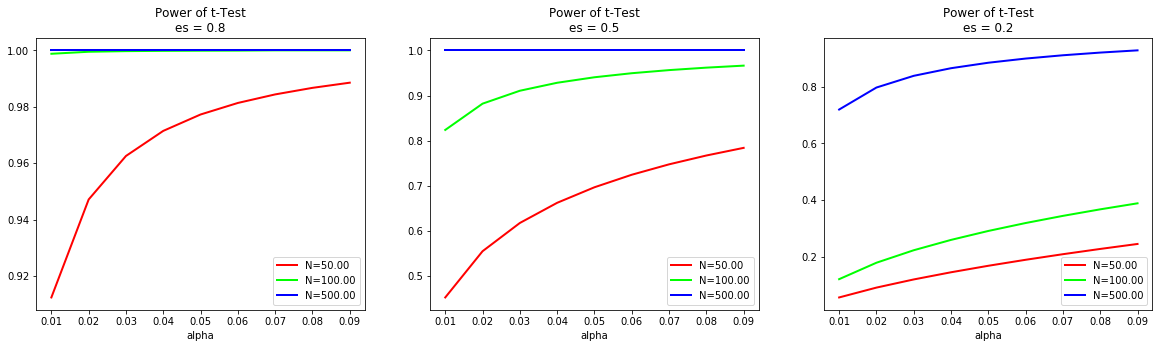

In [39]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,3,1)
fig = TTestIndPower().plot_power(dep_var='alpha', 
                                alpha=np.arange(0.01,0.1,0.01), 
                                nobs=np.array([50,100,500]),
                                effect_size=0.8,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + 'es = 0.8')


ax = fig.add_subplot(1,3,2)
fig = TTestIndPower().plot_power(dep_var='alpha', 
                                alpha=np.arange(0.01,0.1,0.01), 
                                nobs=np.array([50,100,500]),
                                effect_size=0.5,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + 'es = 0.5')

ax = fig.add_subplot(1,3,3)
fig = TTestIndPower().plot_power(dep_var='alpha', 
                                alpha=np.arange(0.01,0.1,0.01), 
                                nobs=np.array([50,100,500]),
                                effect_size=0.2,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + 'es = 0.2')



### 4. Power & Effect Size
- Power increases as the effect size gets larger


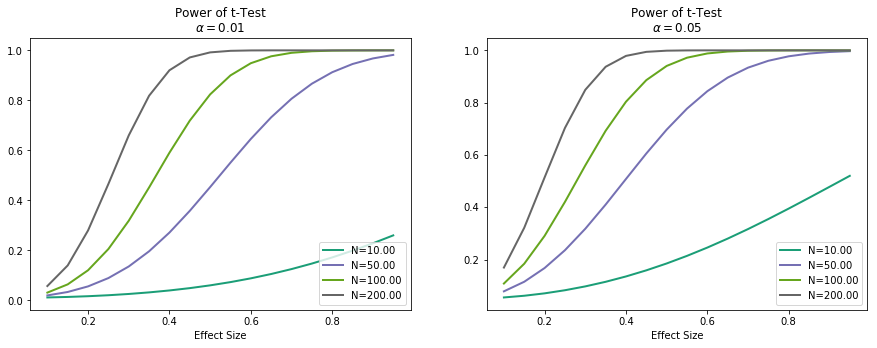

In [40]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
fig = TTestIndPower().plot_power(dep_var='effect_size', 
                                nobs=np.array([10,50,100,200]), 
                                effect_size=np.arange(0.1,1,0.05),
                                alpha=0.01,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')


ax = fig.add_subplot(1,2,2)
fig = TTestIndPower().plot_power(dep_var='effect_size', 
                                nobs=np.array([10,50,100,200]), 
                                effect_size=np.arange(0.1,1,0.05),
                                alpha=0.05,
                                ax=ax, 
                                title='Power of t-Test' + '\n' + r'$\alpha = 0.05$')